## Stream functions for flow past cylinder, creeping limit, slipage

In [16]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


In [17]:

def psi_c_general(x , y , func ):
    """
    Converts Cartesian x and y to polar coords, and calls func
    """
    r = np.sqrt(x**2+y**2)
    th= np.arctan2(y,x)  #  np.arctan(y/x)# 
    return func(r,th)


### Creeping flow past cylinder

In [6]:
def psi(r,th):
    return np.where( r <= 1.0 , 0 , 1*(r-1/r)*np.sin(th) - 1*( 1 - 1/r**2 )*np.sin(2*th) )  

def psi_moving(r,th):
    return np.where( r <= 1.0 , 0 , (0-1/r)*np.sin(th) - ( 1 - 1/r**2 )*np.sin(2*th) )  

def press(r,th):
    return np.where( r <= 1.0 , 0 , -4 /r**2 *np.cos(2*th) )  


In [7]:
deltax=0.02
lim = 5
nn = int(2*lim/deltax)
x = np.linspace( -lim , lim , nn )
y = np.linspace( -lim , lim , nn )
X, Y = np.meshgrid(x, y)
Zc = 1*psi_c_general ( X  ,  Y , psi  )
P = psi_c_general ( X  ,  Y , press  )

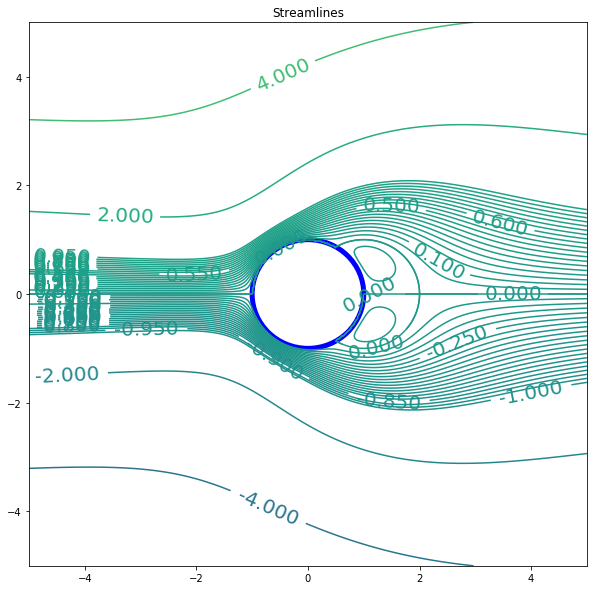

In [8]:
circle = plt.Circle((0 , 0 ), 1 , color='blue',fill=False,lw=5)
height=10
fig, ax = plt.subplots(figsize=(1*height, height) )
r1=np.arange(-14,14, 2 ) ; r2=  np.arange(-1,1,0.05) ;rr=np.concatenate( [ r1 , r2 ] ); rr.sort() 
#CS2 = ax.contourf(X, Y,P  ) 
CS = ax.contour(X, Y, Zc , levels= rr ) 


ax.clabel(CS, inline=1, fontsize=20)
ax.set_title('Streamlines')
#ax.set_ylim(0,lim )
#ax.set_aspect( 1 )
ax.add_artist(circle)

In [9]:
fig.savefig('creeping_flow_past_cyl_slip.eps')

In [10]:
deltax=0.02
lim = 5
nn = int(2*lim/deltax)
x = np.linspace( -lim , lim , nn )
y = np.linspace( -lim , lim , nn )
X, Y = np.meshgrid(x, y)
Zc = 1*psi_c_general ( X  ,  Y , psi_moving  )

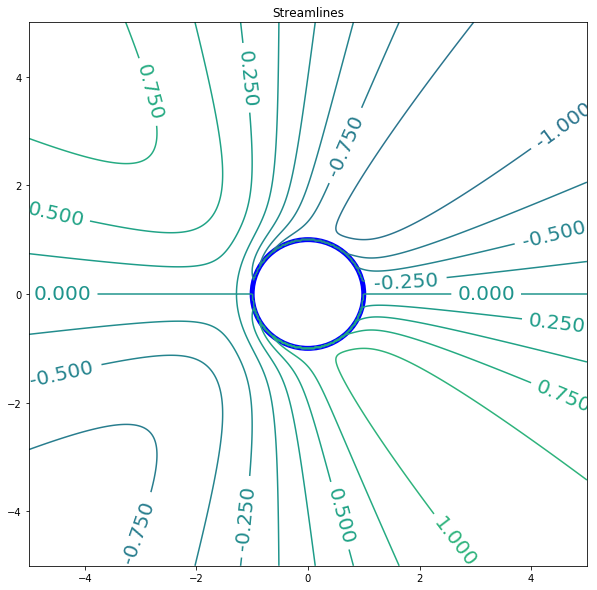

In [11]:
circle = plt.Circle((0 , 0 ), 1 , color='blue',fill=False,lw=5)
height=10
fig, ax = plt.subplots(figsize=(1*height, height) )
CS = ax.contour(X, Y, Zc , levels= np.arange(-4, 4, 0.25) ) 
ax.clabel(CS, inline=1, fontsize=20)
ax.set_title('Streamlines')
#ax.set_ylim(0,lim )
ax.add_artist(circle)


In [12]:
fig.savefig('creeping_flow_past_cyl_slip_moving.eps')

In [22]:
def ur (r,th):
    return np.where( r <= 1.0 , 0 ,  (1-1/r**2 )*np.cos(th) - 2*( 1/r - 1/r**3 )*np.cos(2*th) )  

def uth (r,th):
    return np.where( r <= 1.0 , 0 , -(1+1/r**2 )*np.sin(th) + 2 /r**3 * np.sin(2*th) )  

def u(r,th):
    return np.where( r < 1.0 , 0 , np.sqrt( ur(r,th)**2 + uth(r,th)**2 ))

In [25]:
deltax=0.1
limy = 2
limx = 4

nnx = int(2*limx/deltax)
nny = int(2*limy/deltax)

x2 = np.linspace( -limx , limx , nny )
y2 = np.linspace( -limy , limy , nny )
X2, Y2 = np.meshgrid(x2, y2)

UR = psi_c_general ( X2  ,  Y2 , ur )
UT = psi_c_general ( X2  ,  Y2 , uth )

RR = np.sqrt( X2**2 + Y2**2 )
COS = X2 / RR
SIN = Y2 / RR

UX =  UR*COS-UT*SIN
UY =  UR*SIN+UT*COS

U = psi_c_general ( X,  Y, u )

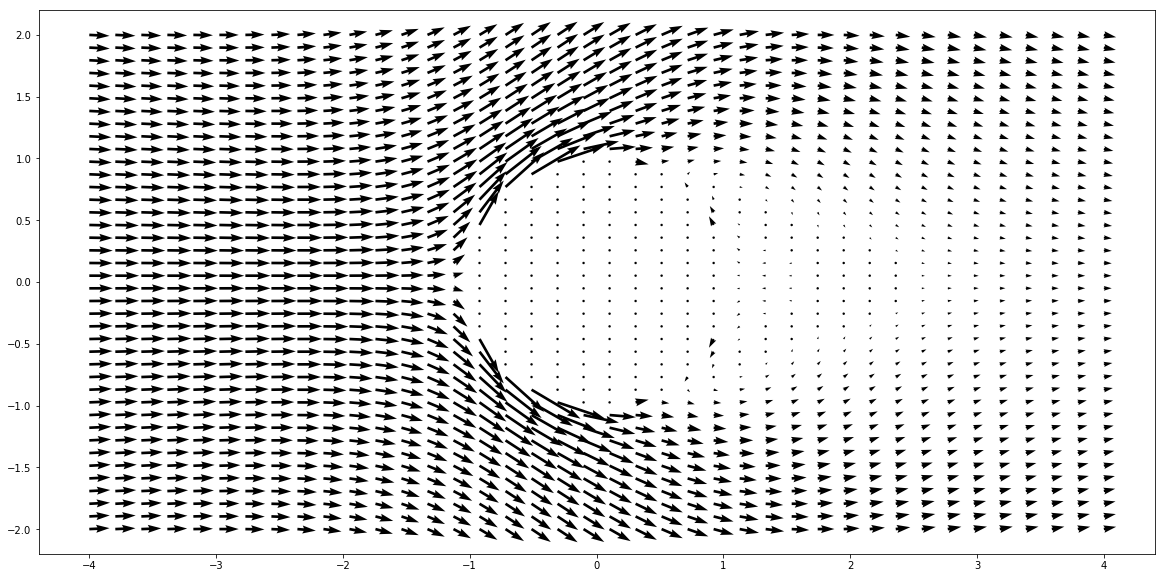

In [20]:
fig, ax = plt.subplots(figsize=(2*height, height) )
qu = ax.quiver(X2, Y2, UX, UY )

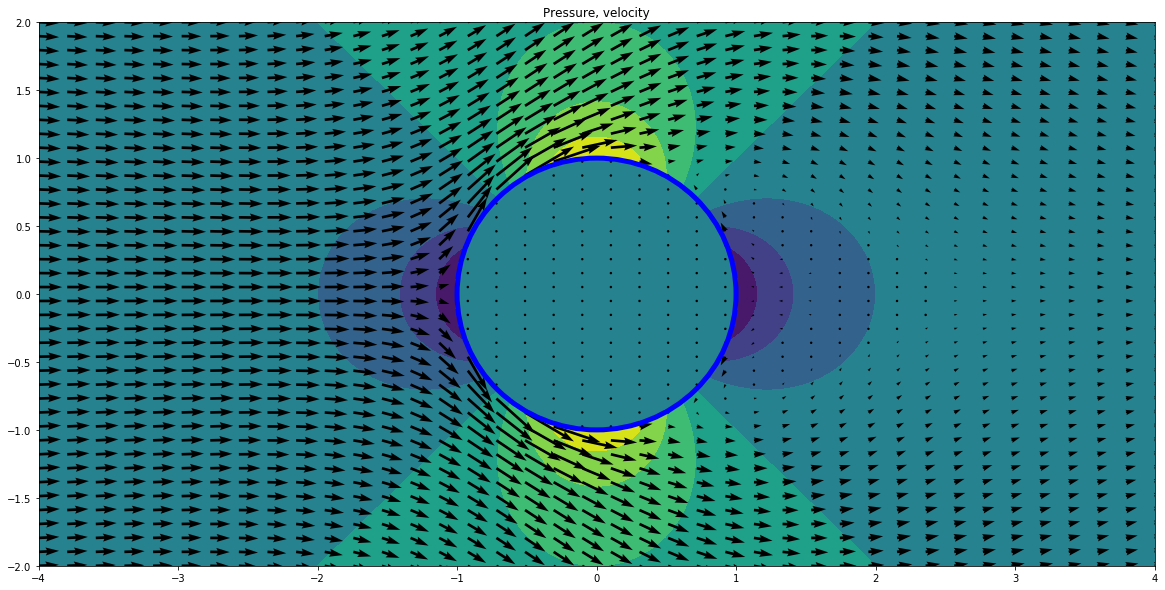

In [55]:
circle = plt.Circle((0 , 0 ), 1 , color='blue',fill=False,lw=5)
height=10
fig, ax = plt.subplots(figsize=(2*height, height) )
r1=np.arange(-14,14, 2 ) ; r2=  np.arange(-1,1,0.05) ;rr=np.concatenate( [ r1 , r2 ] ); rr.sort() 
CS2 = ax.contourf(X, Y,P  ) 
#CS = ax.contour(X, Y, Zc , levels= rr ) 
qu = ax.quiver(X2, Y2, UX, UY )

ax.clabel(CS, inline=1, fontsize=20)
ax.set_title('Pressure, velocity')

ax.set_xlim(-limx,limx )
ax.set_ylim(-limy,limy )
#ax.set_aspect( 1 )
ax.add_artist(circle)

TypeError: colorbar() missing 1 required positional argument: 'mappable'

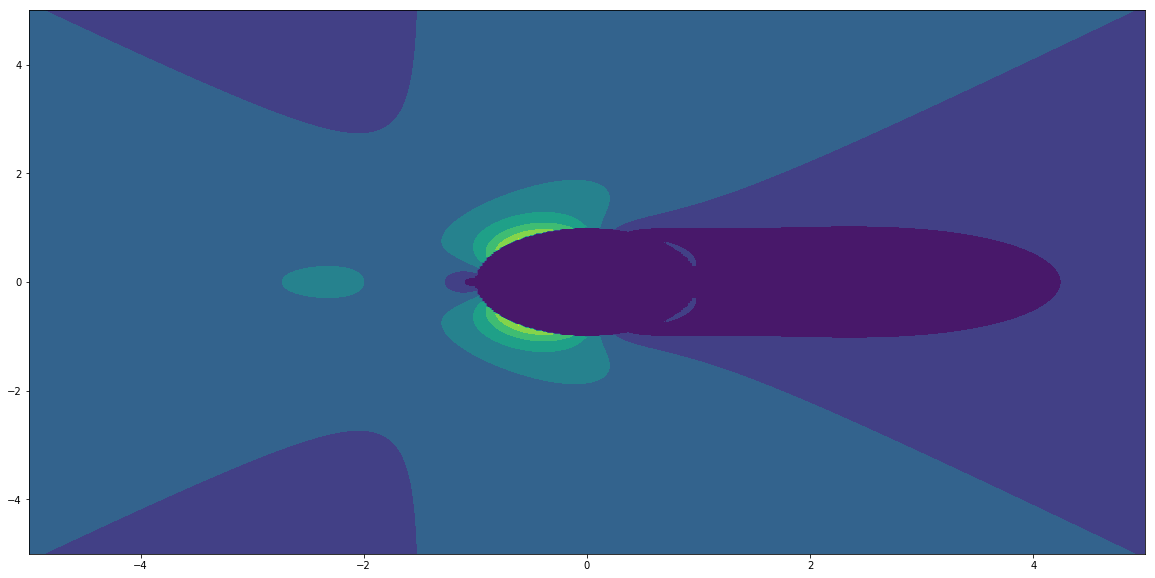

In [27]:
circle = plt.Circle((0 , 0 ), 1 , color='blue',fill=False,lw=5)
height=10
fig, ax = plt.subplots(figsize=(2*height, height) )
r1=np.arange(-14,14, 2 ) ; r2=  np.arange(-1,1,0.05) ;rr=np.concatenate( [ r1 , r2 ] ); rr.sort() 
CS2 = ax.contourf(X, Y,U )
fig.colorbar()
#CS = ax.contour(X, Y, Zc , levels= rr ) 
qu = ax.quiver(X2, Y2, UX, UY )

ax.clabel(CS, inline=1, fontsize=20)
ax.set_title('Pressure, velocity')

ax.set_xlim(-limx,limx )
ax.set_ylim(-limy,limy )
#ax.set_aspect( 1 )
ax.add_artist(circle)
